# Richards Wing Stability analysis

In [135]:
import plotly

from plotly.offline import iplot, init_notebook_mode
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio

import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd

plt.style.use('report')

In [136]:
def load_evals(u_inf):
    route = './cases/horten_u_inf%04d/horten_u_inf%04d/stability' % (u_inf*100, u_inf*100)
    evals_data = pd.read_csv(route + '/eigenvalues.csv')
    evals = evals_data['0'] + 1j*evals_data['1']
    return evals

In [137]:
e_real = np.array([], dtype=float)
e_imag = np.array([], dtype=float)
u_inf_array = np.array([], dtype=float)

for u_inf in np.linspace(25, 45, 21):
    evals = load_evals(u_inf)
    e_real = np.concatenate((e_real, evals.real))
    e_imag = np.concatenate((e_imag, evals.imag))
    u_inf_array = np.concatenate((u_inf_array, np.ones_like(evals.imag)*u_inf))

In [138]:
# fig = go.Figure()

# fig.add_scatter(x=e_real,
#                 y=e_imag, 
#                mode='markers',
#                 marker=dict(color = u_inf_array, #set color equal to a variable
#         colorscale='Viridis',
#         showscale=True));
    
# iplot(fig)

In [139]:
wn = np.sqrt(e_real**2 + e_imag**2)
damping = -e_real / wn

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in true_divide

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide



In [140]:
# fig = go.Figure()
# fig.add_scatter(x = u_inf_array[wn<50], 
#                y = damping[wn<50],
#                mode='markers');
# iplot(fig)

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in less



(-0.1, 1)

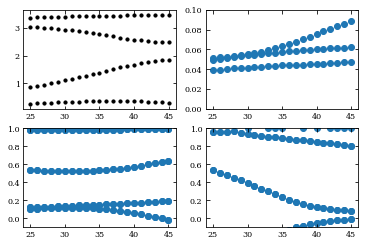

In [141]:
fig, ax = plt.subplots(nrows=2, ncols=2)
conditions1 = (wn<30)*(wn>4)*(e_imag>0)*(damping<1)
ax[0,0].scatter(u_inf_array[conditions1], e_imag[conditions1] / 2 / np.pi, marker='o', s=10, color='k')
# ax[0,0].set_ylim(5, 30)
ax[0,1].scatter(u_inf_array[(wn<1)*(e_imag>0)], wn[(wn<1)*(e_imag>0)] / 2 / np.pi)
ax[0,1].set_ylim(0, 0.1)

ax[1,0].scatter(u_inf_array[(wn<30)*(wn>5)], damping[(wn<30)*(wn>5)])
ax[1,0].set_ylim(-0.1, 1)
ax[1,1].scatter(u_inf_array[wn<1], damping[wn<1])
ax[1,1].set_ylim(-0.1, 1)

# Root Locus of Baseline Horten Wing Trimmed at 28 m/s

Dynamical System Eigenvalues at the trim condition at 28 m/s

|    mode    | eval_real  | eval_imag  |freq_n (Hz) |freq_d (Hz) |  damping   | period (s) | Description |
|------------|------------|------------|------------|------------|------------|------------|-------------|
|0           |0.123962    |0.199909    |0.037437    |0.031817    |-0.526996   |31.430190   |
|1           |0.123962    |-0.199909   |0.037437    |0.031817    |-0.526996   |31.430190   |
|12          |-0.000000   |0.000000    |0.000000    |0.000000    |1.000000    |inf         |
|13          |-0.160143   |-0.226057   |0.044091    |0.035978    |0.578064    |27.794712   | Highly damped yaw oscillation |
|14          |-0.160143   |0.226057    |0.044091    |0.035978    |0.578064    |27.794712   |
|15          |-0.226265   |-0.224681   |0.050750    |0.035759    |0.709587    |27.964921   | Highly damped long period pitch |
|16          |-0.226265   |0.224681    |0.050750    |0.035759    |0.709587    |27.964921   |
|17          |-2.133966   |-18.799524  |3.011252    |2.992037    |0.112787    |0.334220    | 1 SOB      |
|18          |-2.133966   |18.799524   |3.011252    |2.992037    |0.112787    |0.334220    |
|19          |-2.830282   |21.362948   |3.429728    |3.400019    |0.131338    |0.294116    | 1 AsOB     |
|20          |-2.830282   |-21.362948  |3.429728    |3.400019    |0.131338    |0.294116    |
|21          |-3.238511   |-38.069322  |6.080805    |6.058921    |0.084763    |0.165046    | 2 SOB      |
|22          |-3.238511   |38.069322   |6.080805    |6.058921    |0.084763    |0.165046    |
|23          |-3.955073   |6.286720    |1.182099    |1.000563    |0.532502    |0.999438    | SPPO       |
|24          |-3.955073   |-6.286720   |1.182099    |1.000563    |0.532502    |0.999438    |
|25          |-4.626468   |40.566031   |6.498137    |6.456284    |0.113313    |0.154888    |
|26          |-4.626468   |-40.566031  |6.498137    |6.456284    |0.113313    |0.154888    |
|27          |-5.252715   |-48.523677  |7.767900    |7.722783    |0.107622    |0.129487    |
|28          |-5.252715   |48.523677   |7.767900    |7.722783    |0.107622    |0.129487    |
|29          |-7.110366   |52.767157   |8.474056    |8.398154    |0.133543    |0.119074    |
|30          |-7.110366   |-52.767157  |8.474056    |8.398154    |0.133543    |0.119074    |
|31          |-7.785428   |-59.251970  |9.511301    |9.430244    |0.130275    |0.106042    |
|32          |-7.785428   |59.251970   |9.511301    |9.430244    |0.130275    |0.106042    |
|33          |-10.566331  |1.952051    |1.710141    |0.310679    |0.983360    |3.218760    | Lateral disp + 1 AsOB |
|34          |-10.566331  |-1.952051   |1.710141    |0.310679    |0.983360    |3.218760    |
|35          |-12.077282  |71.481323   |11.537845   |11.376606   |0.166596    |0.087900    |
|36          |-12.077282  |-71.481323  |11.537845   |11.376606   |0.166596    |0.087900    |
|37          |-13.643601  |78.642210   |12.703262   |12.516296   |0.170936    |0.079896    |
|38          |-13.643601  |-78.642210  |12.703262   |12.516296   |0.170936    |0.079896    |
|39          |-14.885409  |0.000000    |2.369086    |0.000000    |1.000000    |inf         |

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in less



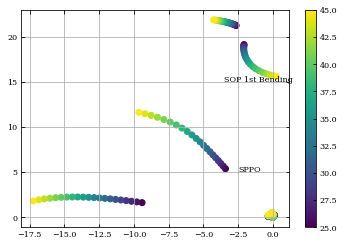

In [142]:
fig = plt.figure()
ax = fig.gca()

conditions = (wn<30) * (e_imag>=0) * (damping<1)

dataplot = ax.scatter(e_real[conditions], e_imag[conditions], c=u_inf_array[conditions])
cbar = fig.colorbar(dataplot)

# Modes
ax.annotate('SPPO', (-2.5, 5))
ax.annotate('SOP 1st Bending', (-3.5, 15))


plt.grid()
plt.savefig('./figs/RL.eps')
plt.show()

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in less



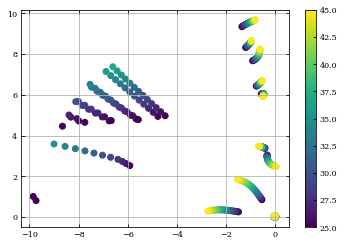

In [156]:
fig = plt.figure()
ax = fig.gca()

conditions = (wn<10*2*np.pi) * (e_imag>=0) * (damping<1)

dataplot = ax.scatter(e_real[conditions]/2/np.pi, e_imag[conditions]/2/np.pi, c=u_inf_array[conditions])
cbar = fig.colorbar(dataplot)

# Modes
# ax.annotate('SPPO', (-2.5, 5))
# ax.annotate('SOP 1st Bending', (-3.5, 15))


plt.grid()
plt.savefig('./figs/RL_Hz.eps')
plt.show()

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning:

invalid value encountered in less



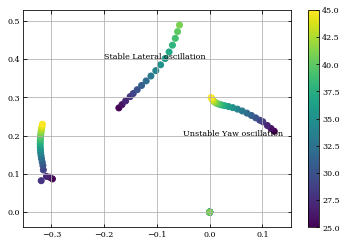

In [162]:
fig = plt.figure()
ax = fig.gca()

conditions = (wn<0.5) * (e_imag>=0) * (damping<1)

dataplot = ax.scatter(e_real[conditions], e_imag[conditions], c=u_inf_array[conditions])
cbar = fig.colorbar(dataplot)

# Modes
ax.annotate('Unstable Yaw oscillation', (-0.05, 0.2))
ax.annotate('Stable Lateral oscillation', (-0.2, 0.4))


plt.grid()
plt.savefig('./figs/RL_zoom_in.eps')
plt.show()

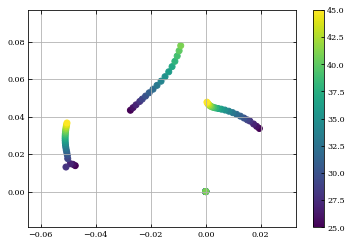

In [164]:
fig = plt.figure()
ax = fig.gca()

dataplot = ax.scatter(e_real[conditions]/2/np.pi, e_imag[conditions]/2/np.pi, c=u_inf_array[conditions])
cbar = fig.colorbar(dataplot)

# Modes
# ax.annotate('Unstable Yaw oscillation', (-0.05, 0.2))
# ax.annotate('Stable Lateral oscillation', (-0.2, 0.4))


plt.grid()
plt.savefig('./figs/RL_zoom_in_Hz.eps')
plt.show()

/home/ng213/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in less



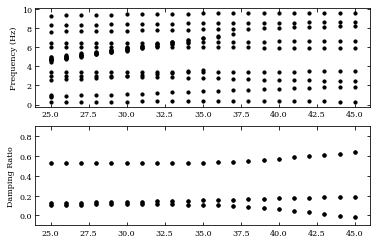

In [158]:
fig, ax = plt.subplots(nrows=2)
conditions1 = (wn<10*2*np.pi)*(wn>4)*(e_imag>0)*(damping<1)
ax[0].scatter(u_inf_array[conditions1], e_imag[conditions1] / 2 / np.pi, marker='o', s=10, color='k')
# ax[0,0].set_ylim(5, 30)
# ax[0].scatter(u_inf_array[(wn<1)*(e_imag>0)], wn[(wn<1)*(e_imag>0)] / 2 / np.pi)
# ax[0].set_ylim(0, 0.1)

ax[1].scatter(u_inf_array[(wn<30)*(wn>5)], damping[(wn<30)*(wn>5)], marker='o', s=10, color='k')
ax[1].set_ylim(-0.1, 0.9)

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Damping Ratio')


plt.savefig('./figs/freq.eps')

# Nonlinear Flutter analysis

u_inf = 45

In [172]:
from scipy.fftpack import fft
data = dict()

In [146]:
u_inf = 45
M = 4
data45 = pd.read_csv('../03_BaselineNonlinear/cases/horten/output/data_node_0.csv')
dt = 1 / M / u_inf
t = np.array(data45['Time'] * dt)

In [181]:
u_inf = 40
data[u_inf] = dict()
data[u_inf]['data'] = pd.read_csv('../03_BaselineNonlinear//cases/horten_u_inf4000/output/node0_data.csv')
data[u_inf]['dt'] = 1 / M / u_inf
data[u_inf]['t'] = data[u_inf]['data']['Time'] * data[u_inf]['dt']
data[u_inf]['theta'] =  np.array(np.arctan(data[u_inf]['data']['local_z (0) (stats)'] / data[u_inf]['data']['local_z (2) (stats)']) * 180 / np.pi)

In [182]:
theta = np.arctan(data45['local_z (0) (stats)'] / data45['local_z (2) (stats)']) * 180 / np.pi

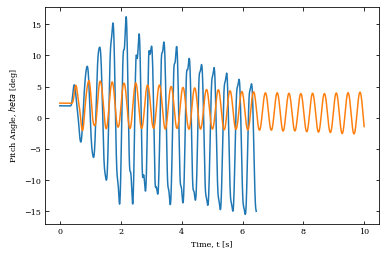

In [183]:
fig = plt.figure()

plt.plot(t, theta)
plt.plot(data[40]['t'], data[40]['theta'])
plt.xlabel('Time, t [s]')
plt.ylabel('Pitch Angle, $\theta$ [deg]')
plt.show()

### Fourier transform

Attending to the linear analysis, the flutter mode has a frequency of approximately 2.5Hz, which is corroborated by the frequency content of the pitch variable. The pitch response includes the largest peak at the flutter frequency and other peaks are at the lower end, consistent with the rigid body dynamics and at the upper end consistent with the next pair of structural modes.

At speed below the flutter speed, the frequency content coincides with the 1 symmetric out of plane bending mode + SPPO and the rigid body dynamics. The higher frequency structural modes are not excited


In [185]:
yf = fft(theta)
xf = np.linspace(0, 1 / 2 / dt, len(t)//2)

data[40]['yf'] = fft(data[40]['theta'])
data[40]['xf'] = np.linspace(0, 1 / 2 / data[40]['dt'], len(data[40]['t'])//2)

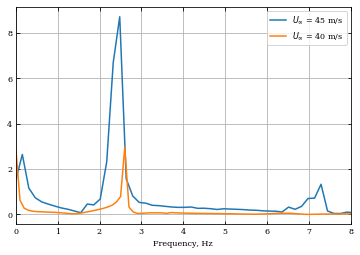

In [187]:
plt.plot(xf, 2.0/len(t) * np.abs(yf[0:len(t)//2]), label='$U_\infty$ = 45 m/s')
plt.plot(data[40]['xf'], 2.0/len(data[40]['t']) * np.abs(data[40]['yf'][0:len(data[40]['t'])//2]), label='$U_\infty$ = 40 m/s')
plt.legend()
plt.grid()
plt.xlim(0, 8)
plt.xlabel('Frequency, Hz')
plt.show()